<a href="https://colab.research.google.com/github/powhenagbo/SDS-CP009-ds-salary-pred/blob/main/Copy_of_Paul_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import re

In [2]:
# Load the dataset
df = pd.read_csv('salaries.csv')

In [3]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [4]:
mv=df.isnull().sum()
mv

,0
Company,2
Company Score,81
Job Title,0
Location,13
Date,0
Salary,106


In [5]:
df2 = df[df.Company.notna()]
df2 = df[df['Company Score'].notna()]
df2 = df[df.Location.notna()]
df2 = df[df.Salary.notna()]
df2

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.)
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K (Employer est.)
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K (Glassdoor est.)
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K (Glassdoor est.)


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        764 non-null    object 
 1   Company Score  764 non-null    float64
 2   Job Title      764 non-null    object 
 3   Location       753 non-null    object 
 4   Date           764 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


In [7]:
len(df2.Company.unique())

587

In [8]:
#now we'll gonna rid of the "(Glassdoor est)" thing in salary estimate col
salary = df2['Salary'].apply(lambda x: x.split('(')[0])
salary

,Salary
0,$68K - $94K
1,$61K - $104K
2,$95K - $118K
3,$97K - $145K
4,$85K - $108K
...,...
759,$160K - $385K
760,$222K
761,$82K - $118K
762,$69K - $107K


In [9]:
#now we'll gonna replace $ sign and K in salary estimate col
dollarK = salary.apply(lambda x: x.replace('K','').replace('$',''))
dollarK

,Salary
0,68 - 94
1,61 - 104
2,95 - 118
3,97 - 145
4,85 - 108
...,...
759,160 - 385
760,222
761,82 - 118
762,69 - 107


In [10]:
#there is per hour statement written on sal est so we'll gonna make another col for that
df2['hourly'] = df2['Salary'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df2

<ipython-input-10-5c7f3d1b6483>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hourly'] = df2['Salary'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)


,Company,Company Score,Job Title,Location,Date,Salary,hourly
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),0
...,...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.),0
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K (Employer est.),0
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K (Glassdoor est.),0
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K (Glassdoor est.),0


In [11]:
#so there is also this thing written on that sal est col and we'll gonna make diff col for that
df2['source'] = df2['Salary'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df2

<ipython-input-11-ea9e9fbf89bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['source'] = df2['Salary'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)


,Company,Company Score,Job Title,Location,Date,Salary,hourly,source
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),0,0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),0,0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),0,0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),0,0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),0,0
...,...,...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.),0,0
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K (Employer est.),0,0
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K (Glassdoor est.),0,0
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K (Glassdoor est.),0,0


In [12]:
#now we'll gonna replace this statements with a blank in salary estimate col
remove_hr = dollarK.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
remove_hr

,Salary
0,68 - 94
1,61 - 104
2,95 - 118
3,97 - 145
4,85 - 108
...,...
759,160 - 385
760,222
761,82 - 118
762,69 - 107


In [13]:
# Function to clean and handle salary strings with potential issues
def clean_salary_string(salary_str):
    if isinstance(salary_str, str):
        # Remove unwanted characters like "Per Hour" or extra spaces
        salary_str = re.sub(r'[^\dK-]', '', salary_str)
        salary_parts = salary_str.split('-')

        if len(salary_parts) == 2:
            # Extract both min and max salary from the range
            min_salary = int(salary_parts[0].replace('K', '')) * 1000
            max_salary = int(salary_parts[1].replace('K', '')) * 1000
        elif len(salary_parts) == 1:
            # Only one value, assume it's both min and max
            min_salary = max_salary = int(salary_parts[0].replace('K', '')) * 1000
        else:
            min_salary = max_salary = None
    else:
        min_salary = max_salary = None

    return pd.Series([min_salary, max_salary])

# Apply the cleaning function
df2[['min_salary', 'max_salary']] =df2['Salary'].apply(clean_salary_string)

# Display the cleaned data with min_salary and max_salary
df2.head()


<ipython-input-13-3d97ce2e65de>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['min_salary', 'max_salary']] =df2['Salary'].apply(clean_salary_string)
<ipython-input-13-3d97ce2e65de>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['min_salary', 'max_salary']] =df2['Salary'].apply(clean_salary_string)


,Company,Company Score,Job Title,Location,Date,Salary,hourly,source,min_salary,max_salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),0,0,68000,94000
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),0,0,61000,104000
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),0,0,95000,118000
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),0,0,97000,145000
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),0,0,85000,108000


In [14]:
# Safely extract the state from the 'Location' column, handling NaN values
df2['job_state'] = df2['Location'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) and ',' in x else 'Unknown')

# Display the first few rows to verify the change
df2.head()



<ipython-input-14-542dbc154c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['job_state'] = df2['Location'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) and ',' in x else 'Unknown')


,Company,Company Score,Job Title,Location,Date,Salary,hourly,source,min_salary,max_salary,job_state
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),0,0,68000,94000,VA
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),0,0,61000,104000,Unknown
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),0,0,95000,118000,NC
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),0,0,97000,145000,CA
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),0,0,85000,108000,TX


In [15]:
df2.job_state.value_counts()

,count
job_state,
Unknown,127
CA,103
MD,69
WA,42
TX,42
VA,37
MA,37
FL,27
NY,26


In [16]:
#now we'll gonna see some few more columns, split them from salary estimate
df2['avg_salary'] = (df2.min_salary+df2.max_salary)/2
df2

<ipython-input-16-cb46d40f048f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_salary'] = (df2.min_salary+df2.max_salary)/2


,Company,Company Score,Job Title,Location,Date,Salary,hourly,source,min_salary,max_salary,job_state,avg_salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),0,0,68000,94000,VA,81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),0,0,61000,104000,Unknown,82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),0,0,95000,118000,NC,106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),0,0,97000,145000,CA,121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),0,0,85000,108000,TX,96500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
759,OpenAI,3.1,Apprentice ETL Software Engineer,"Elkridge, MD",30d+,$160K - $385K (Employer est.),0,0,160000,385000,MD,272500.0
760,NCR Atleos,3.9,"Software Engineer, Tool & Infrastructure, Reli...","Palo Alto, CA",1d,$222K (Employer est.),0,0,222000,222000,CA,222000.0
761,Electronic Warfare Associates,3.8,"Software Engineer, Engineering Acceleration","San Francisco, CA",5d,$82K - $118K (Glassdoor est.),0,0,82000,118000,CA,100000.0
762,"BillGO, Inc.",3.3,ATM Software Engineer (Level III),"Frisco, TX",30d+,$69K - $107K (Glassdoor est.),0,0,69000,107000,TX,88000.0


In [17]:
df2.columns

Index(['Company', 'Company Score', 'Job Title', 'Location', 'Date', 'Salary',
       'hourly', 'source', 'min_salary', 'max_salary', 'job_state',
       'avg_salary'],
      dtype='object')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 763
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        764 non-null    object 
 1   Company Score  764 non-null    float64
 2   Job Title      764 non-null    object 
 3   Location       753 non-null    object 
 4   Date           764 non-null    object 
 5   Salary         764 non-null    object 
 6   hourly         764 non-null    int64  
 7   source         764 non-null    int64  
 8   min_salary     764 non-null    int64  
 9   max_salary     764 non-null    int64  
 10  job_state      764 non-null    object 
 11  avg_salary     764 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 77.6+ KB


In [19]:
# Converting the columns
df2.columns.str.lower().str.replace(' ','_')

Index(['company', 'company_score', 'job_title', 'location', 'date', 'salary',
       'hourly', 'source', 'min_salary', 'max_salary', 'job_state',
       'avg_salary'],
      dtype='object')

In [20]:
df2.columns = df2.columns.str.lower().str.replace(' ','_')
df2.columns

Index(['company', 'company_score', 'job_title', 'location', 'date', 'salary',
       'hourly', 'source', 'min_salary', 'max_salary', 'job_state',
       'avg_salary'],
      dtype='object')

In [21]:
# Encode the dataset
from sklearn.preprocessing import LabelEncoder

In [22]:
objList = df2.select_dtypes(include='object').columns
objList

Index(['company', 'job_title', 'location', 'date', 'salary', 'job_state'], dtype='object')

In [24]:
columns_to_label_encode = ['company', 'job_title', 'location', 'date', 'salary', 'job_state']
LE = LabelEncoder()

In [29]:
# Encode Every column except age,gender and class
for col in columns_to_label_encode:
  df2.loc[:, col] = LE.fit_transform(df2[col].astype(str))


In [30]:
df2.dtypes

,0
company,int64
company_score,float64
job_title,int64
location,int64
date,int64
salary,int64
hourly,int64
source,int64
min_salary,int64
max_salary,int64


In [55]:
df2.head()

,company,company_score,job_title,location,date,salary,hourly,source,min_salary,max_salary,job_state,avg_salary
0,376,4.8,471,192,7,160,0,0,68000,94000,22,81000.0
1,413,4.3,219,251,27,105,0,0,61000,104000,20,82500.0
2,301,3.9,169,76,27,519,0,0,95000,118000,43,106500.0
3,258,3.5,162,185,27,549,0,0,97000,145000,8,121000.0
4,380,3.1,471,281,27,370,0,0,85000,108000,18,96500.0


Let's see the relation b/w airline and price

<function matplotlib.pyplot.show(close=None, block=None)>

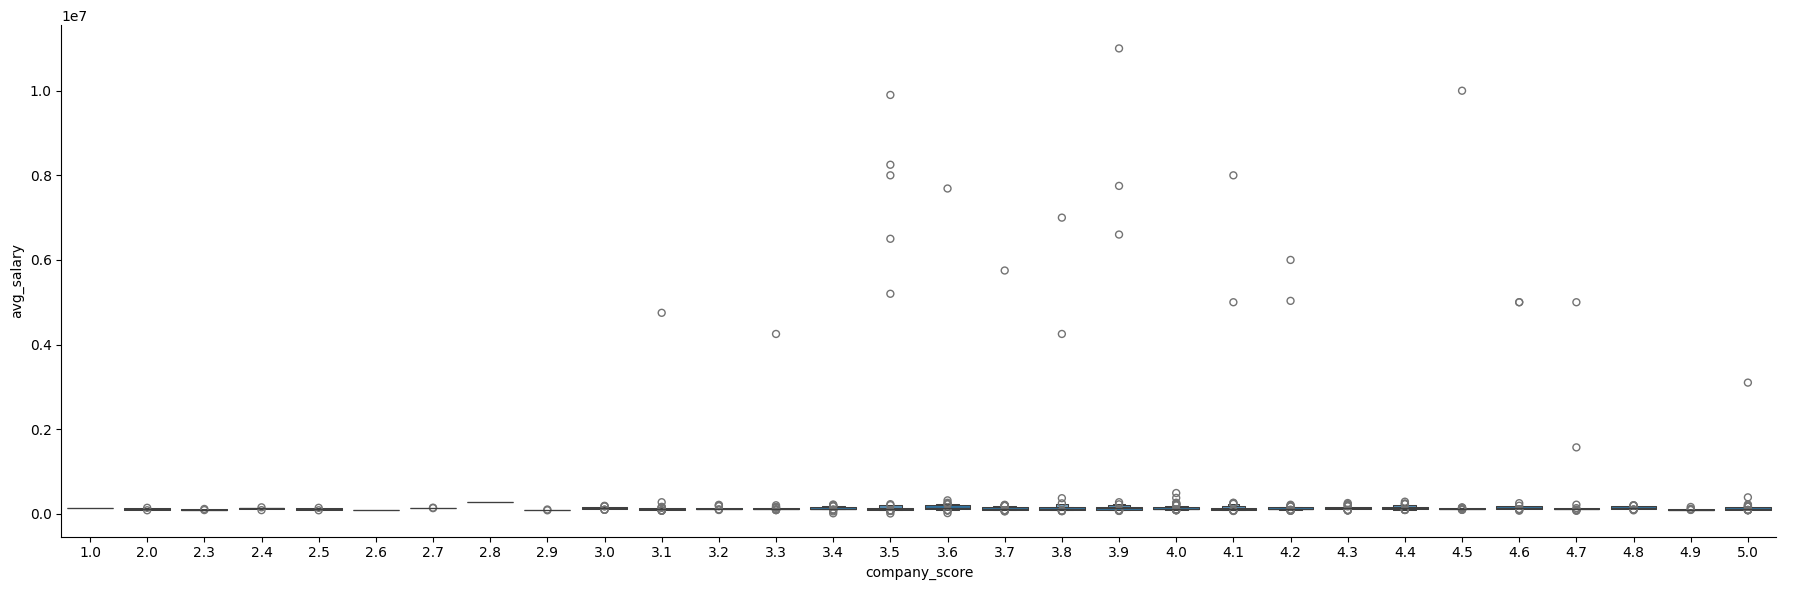

In [38]:
sns.catplot(y='avg_salary',x='company_score',data= df2.sort_values('avg_salary',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [59]:
x= df2.drop(['avg_salary'],axis=1)
y= df2['avg_salary']

In [60]:
x.head()

,company,company_score,job_title,location,date,salary,hourly,source,min_salary,max_salary,job_state
0,376,4.8,471,192,7,160,0,0,68000,94000,22
1,413,4.3,219,251,27,105,0,0,61000,104000,20
2,301,3.9,169,76,27,519,0,0,95000,118000,43
3,258,3.5,162,185,27,549,0,0,97000,145000,8
4,380,3.1,471,281,27,370,0,0,85000,108000,18


In [61]:
y.head()

,avg_salary
0,81000.0
1,82500.0
2,106500.0
3,121000.0
4,96500.0


In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [46]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
model.get_support()

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True])

In [48]:
selected_features=x_train.columns[(model.get_support())]

In [49]:
selected_features

Index(['company', 'job_title', 'location', 'date', 'salary', 'min_salary',
       'max_salary', 'job_state'],
      dtype='object')

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)

ExtraTreesRegressor()

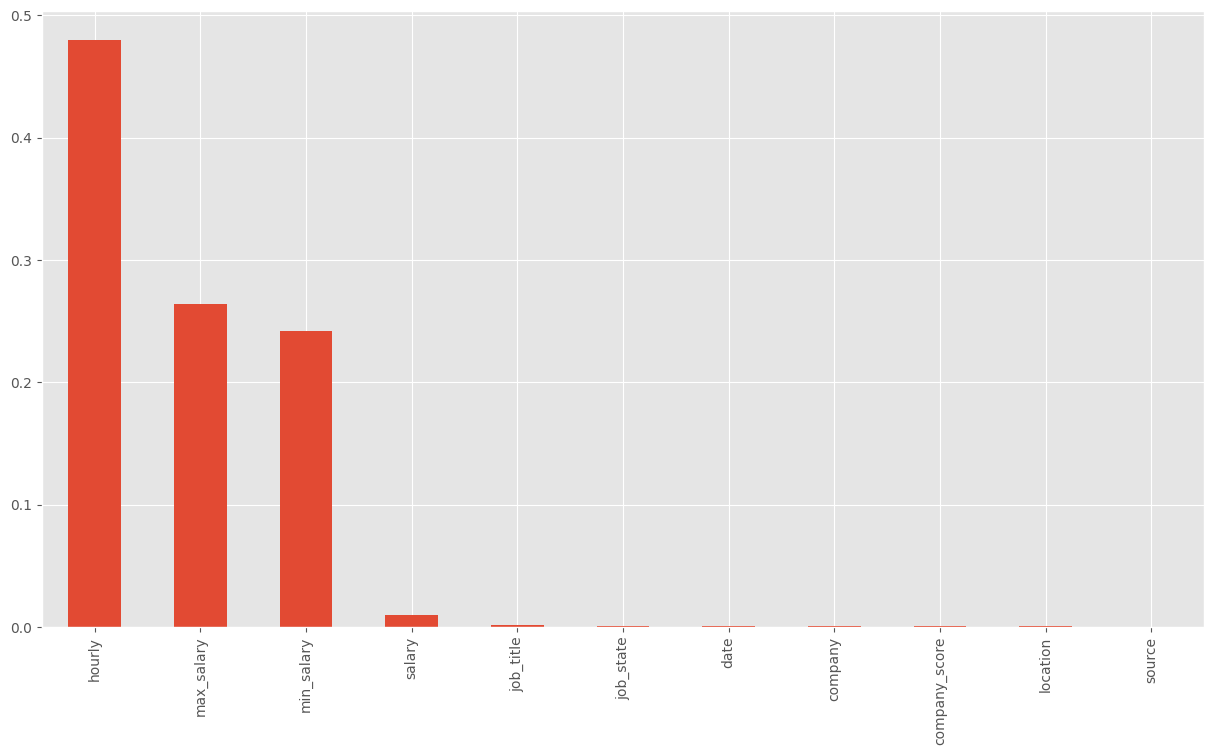

In [64]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

Importing the Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
y_pred = reg_rf.predict(x_test)

In [67]:
reg_rf.score(x_train, y_train)

0.996402662902251

<ipython-input-68-2315f8bf8ae0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


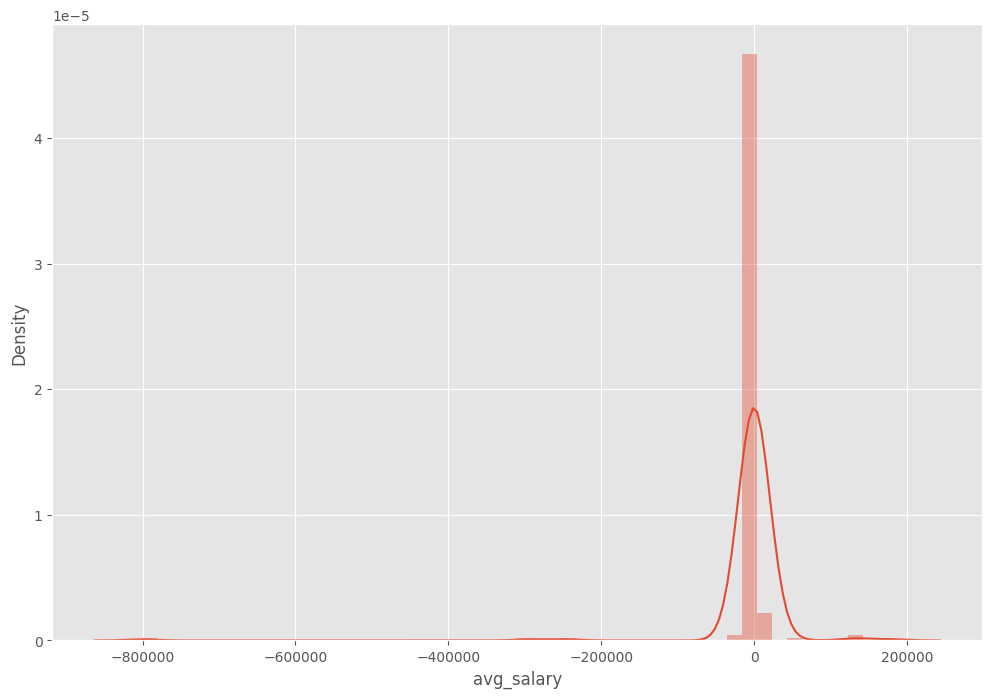

In [68]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

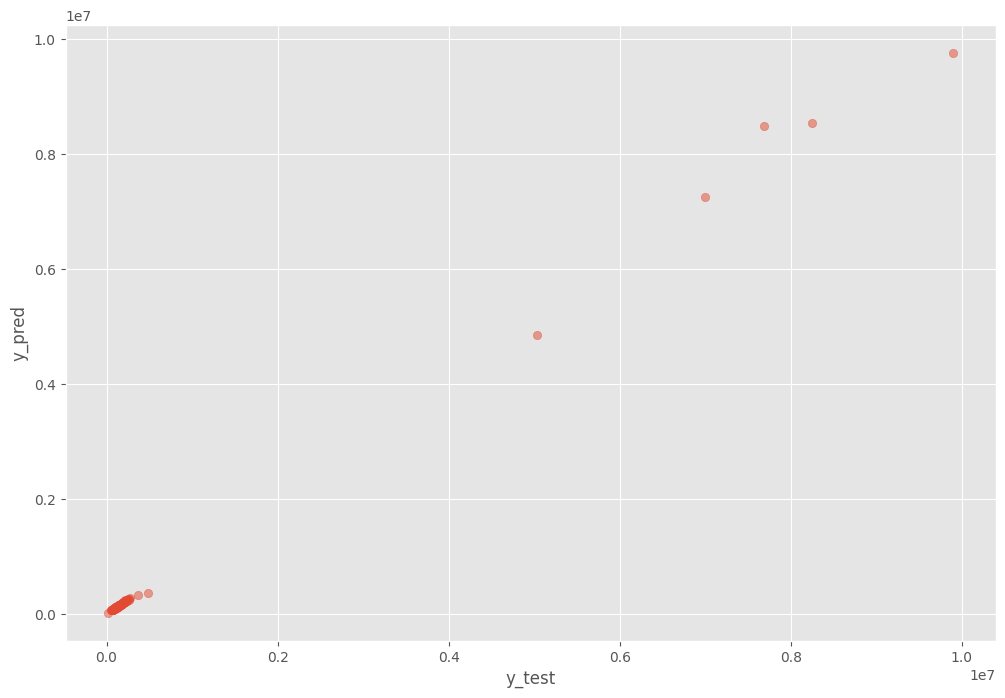

In [69]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 9611.304347826086
MSE: 3746157005.0
RMSE: 61205.857603664044


In [71]:
metrics.r2_score(y_test, y_pred)

0.9969660882733417

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [74]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [77]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [79]:
reg_rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth= 15)

In [80]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [81]:
ypred1= reg_rf.predict(x_test)

In [82]:
ypred1

array([ 111818.46533328,  145655.36246995,   92781.96381741,
        180072.97995259,  131498.0307655 ,  158464.71428571,
         84666.81215367,   96868.31000507,  131724.53259637,
        136752.31472025,   92770.21408572,  261511.44356834,
        272822.39965986,  229189.71088435,  166936.84199134,
        107747.20688768,  119279.95900664,  138609.20455404,
         92747.72638221,  201112.10903977,   96228.12835947,
        131192.85246797,  102169.23869548,  124717.25695921,
        166899.82414933,  103549.32746065,  168967.72717287,
        123255.39781365,  131212.92473623,  108121.12553255,
        107885.25039511,  124266.00865514,   79259.48384354,
         91648.62185639,  287736.09807256,  113750.62667552,
        114158.70648647,  170668.07307696,  123195.07783189,
        202804.67099567,  122315.40467782, 6804798.25680272,
        136146.52735624,  102980.98268634,  188922.06819966,
         93014.83812604,  174490.00382653,  116909.9940179 ,
        149108.94808564,

<ipython-input-83-9f3a4f991d2e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-ypred1)


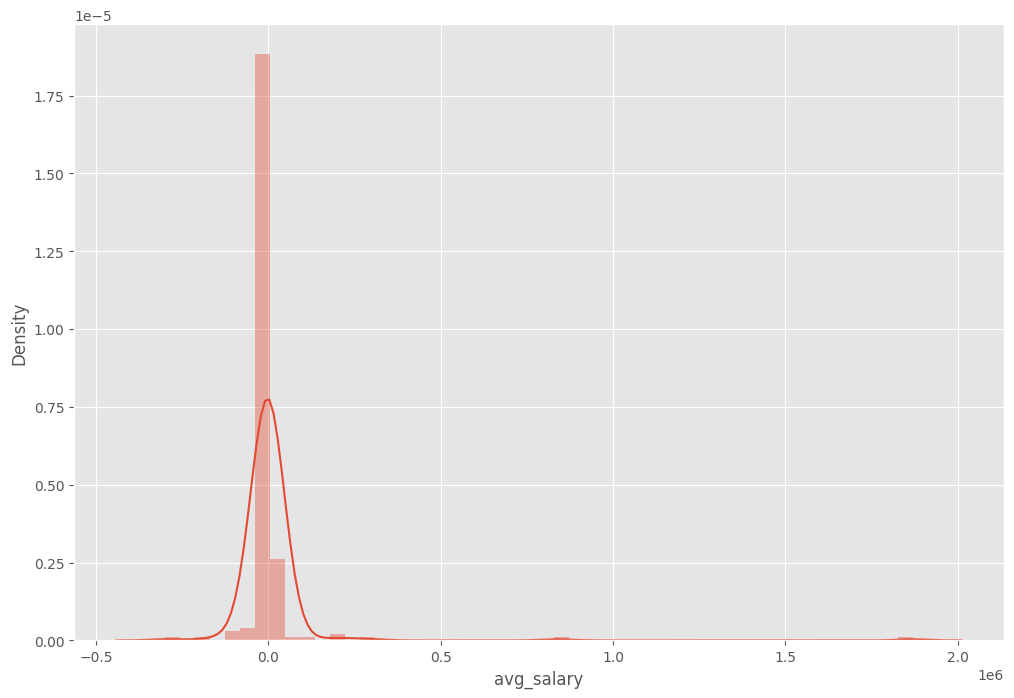

In [83]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred1)
plt.show()

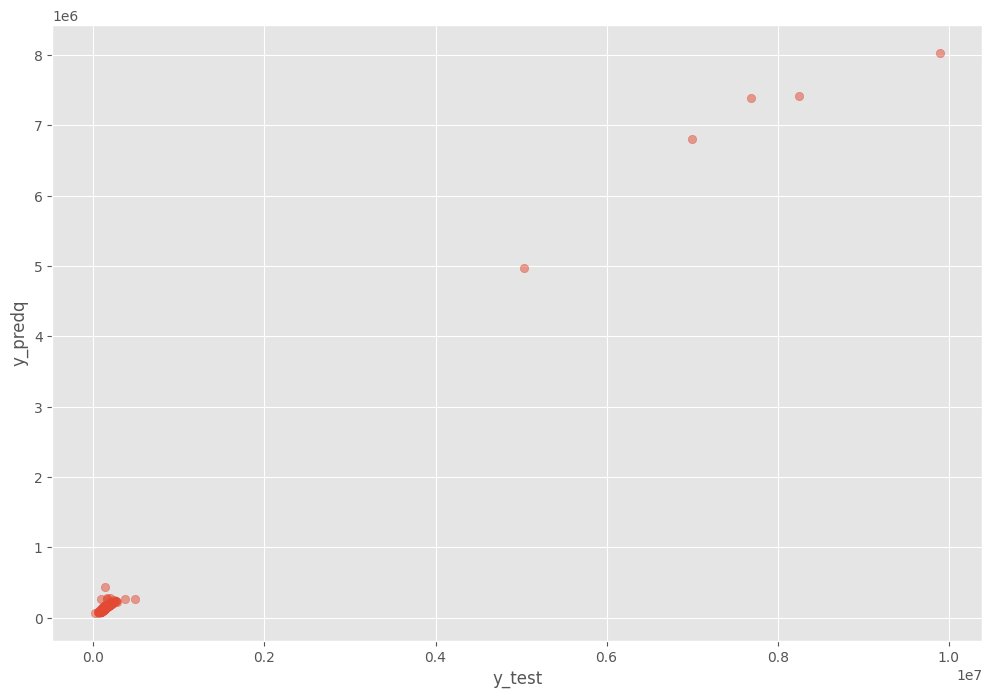

In [84]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 25417.871776248227
MSE: 19870272710.551582
RMSE: 140961.9548337479


In [86]:
metrics.r2_score(y_test, ypred1)

0.9839076009606698

In [ ]:
df.describe()

,Company Score
count,789.000000
mean,3.895311
std,0.524952
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [ ]:
df['Company Score'].value_counts()

,count
Company Score,
4.1,83
3.9,72
3.8,68
4.0,62
3.7,61
3.5,58
4.2,54
3.6,41
3.4,37


In [ ]:
df['Salary'].value_counts()

,count
Salary,
$120K - $150K (Employer est.),5
$129K - $224K (Employer est.),5
$120K - $140K (Employer est.),4
$155K - $221K (Employer est.),3
$160K - $385K (Employer est.),3
...,...
$125K - $200K (Employer est.),1
$168K (Employer est.),1
$110K - $143K (Glassdoor est.),1


In [ ]:
df.describe()

,Company Score
count,789.000000
mean,3.895311
std,0.524952
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [ ]:
# Ensure the value is a string and apply the split, handling non-string values (e.g., floats)
sal = df['Salary'].apply(lambda x: str(x).split('(')[0] if isinstance(x, str) else x)

# Display the result
sal.head()


,Salary
0,$68K - $94K
1,$61K - $104K
2,$95K - $118K
3,$97K - $145K
4,$85K - $108K


In [ ]:
remove_k=sal.apply(lambda x: re.sub(r'[^\d.-]', '', str(x)))
remove_k

,Salary
0,68-94
1,61-104
2,95-118
3,97-145
4,85-108
...,...
865,
866,
867,
868,


In [ ]:
df['min_salary']=remove_k.apply(lambda x: int(x.split('-')[0]))

ValueError: invalid literal for int() with base 10: '80.00'

In [ ]:
remove_k=sal.apply(lambda x:x.replace('K','').replace('$','')if isinstance(x, str) else x)

remove_k

,Salary
0,68 - 94
1,61 - 104
2,95 - 118
3,97 - 145
4,85 - 108
...,...
865,NaN
866,NaN
867,NaN
868,NaN


In [ ]:
remove_k = sal.apply(lambda x: re.sub(r'[^\d.-]', '', str(x)))

# Extract the minimum salary by first converting to float and then to int
df['min_salary'] = remove_k.apply(lambda x: int(float(x.split('-')[0])) if '-' in x else int(float(x)))

# Display the result
df['min_salary']

ValueError: could not convert string to float: ''

In [ ]:
# Assuming df is your DataFrame, and you want to remove 'K' and '$' from the 'Salary' column
remove_k = df['Salary'].apply(lambda x: str(x).replace('K','').replace('$',''))

# Display the result
print(remove_k.head())




0     68 - 94 (Glassdoor est.)
1     61 - 104 (Employer est.)
2    95 - 118 (Glassdoor est.)
3     97 - 145 (Employer est.)
4    85 - 108 (Glassdoor est.)
Name: Salary, dtype: object


In [ ]:
import re

# Remove non-numeric characters except for '-' and extract the salary range
remove_k_cleaned = remove_k.apply(lambda x: re.sub(r'[^\d-]', '', x))

# Extract the minimum salary from the cleaned string
df['min_salary'] = remove_k_cleaned.apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))

# Display the result
print(df[['Salary', 'min_salary']].head())


ValueError: invalid literal for int() with base 10: ''

In [ ]:
df.shape

(870, 6)

In [ ]:
# Function to clean the salary column and extract min and max salary values
def extract_salary_range(salary_str):
    # Use regex to find salary range in the format (e.g., "$68K - $94K")
    salary_range = re.findall(r'(\d+K)', salary_str)

    # If two values are found, assign min and max salary
    if len(salary_range) == 2:
        min_salary = int(salary_range[0].replace('K', '')) * 1000
        max_salary = int(salary_range[1].replace('K', '')) * 1000
        return (min_salary + max_salary) / 2  # Return the average salary
    return None

# Apply the function to the 'Salary' column and create a new column for average salary
df['Average Salary'] = df['Salary'].apply(extract_salary_range)

TypeError: expected string or bytes-like object

In [ ]:
# Now let's check for missing values in the new 'Average Salary' column

missing_salaries = df['Average Salary'].isnull().sum()

# Display the number of missing salaries

missing_salaries

148

In [ ]:
# Create an instance of SimpleImputer for numerical data
imputer_numeric = SimpleImputer(strategy='mean')

# Apply it to the 'Company Score' (numerical column) to fill missing values with the mean
df[['Company Score']] = imputer_numeric.fit_transform(df[['Company Score']])

# For categorical columns (like 'Company', 'Location'), use the most frequent value to fill missing data
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Apply it to the 'Company' and 'Location' columns
df[['Company', 'Location']] = imputer_categorical.fit_transform(df[['Company', 'Location']])


# Create an instance of SimpleImputer for numerical data (strategy = median)
imputer = SimpleImputer(strategy='median')

# Apply it to the 'Average Salary' column to fill missing values with the median
df[['Average Salary']] = imputer.fit_transform(df[['Average Salary']])

# Check for any remaining missing values in the dataset
df.isnull().sum()





KeyError: "None of [Index(['Average Salary'], dtype='object')] are in the [columns]"

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Min Salary,Max Salary,Average Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.),68000.0,94000.0,81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.),61000.0,104000.0,82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.),95000.0,118000.0,106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.),97000.0,145000.0,121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.),85000.0,108000.0,96500.0


In [ ]:
# the 'Salary' column has been drop now that min and max salaries are extracted
df2 = df.drop(columns=['Salary'])

# show the new data without the Salary column
df2.head(20)

,Company,Company Score,Job Title,Location,Date,Min Salary,Max Salary,Average Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,68000.0,94000.0,81000.0
1,Workiva,4.3,Software Support Engineer,Remote,2d,61000.0,104000.0,82500.0
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,95000.0,118000.0,106500.0
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,97000.0,145000.0,121000.0
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,85000.0,108000.0,96500.0
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,123000.0,175000.0,149000.0
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,77000.0,94000.0,85500.0
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,71000.0,100000.0,85500.0
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,94000.0,148000.0,121000.0
9,PFF,4.2,Sr. Software Engineer,Remote,1d,147000.0,189000.0,168000.0


In [ ]:
mv=df2.isnull().sum()
mv

Company           0
Company Score     0
Job Title         0
Location          0
Date              0
Min Salary        0
Max Salary        0
Average Salary    0
dtype: int64

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.to_csv('IT salaries_cleaned new.csv', index=False)

In [ ]:
df3=pd.read_csv('IT salaries_cleaned new.csv')

In [ ]:
# X: All columns except the last one (Average Salary)
X = df3.iloc[:, :-1].values

# y: The last column (Average Salary)
y = df3.iloc[:, -1].values

print("Independent Variables (X):")
print(X)


Independent Variables (X):
[['ViewSoft' 4.8 'Software Engineer' ... '8d' 68000.0 94000.0]
 ['Workiva' 4.3 'Software Support Engineer' ... '2d' 61000.0 104000.0]
 ['Garmin International, Inc.' 3.9 'C# Software Engineer' ... '2d'
  95000.0 118000.0]
 ...
 ['Medtronic' 3.895310519645121 'Senior Software Engineer' ... '19d'
  103481.9944598338 155217.4515235457]
 ['CVS Health' 3.895310519645121 'Junior Python Developer' ... '2d'
  103481.9944598338 155217.4515235457]
 ['CVS Health' 3.895310519645121
  'GUI Software Engineer II - Surgical Robotics' ... '10d'
  103481.9944598338 155217.4515235457]]


In [ ]:
print (y)

[ 81000.  82500. 106500. 121000.  96500. 149000.  85500.  85500. 121000.
 168000. 101500.  66500. 113000. 102500. 240000. 112500. 106000.  89000.
 179000. 108500. 117500.  68500.  81500. 153500. 137500. 133000. 113500.
  93000. 160000. 111000. 129500. 122500. 134500.  96000. 150000.  64500.
 154000. 101500. 150000.  89000. 188000. 138500.  91000. 135000. 106000.
  82000.  77500.  87500.  92500. 166500. 151500. 107000. 177500. 135000.
  85500. 124000.  95000.  84000.  95000.  96500. 117500. 131500. 125000.
 160000. 106500. 117750. 102500. 103000.  83000.   6500.  87000.  72000.
  92500. 104500. 118000. 167500.  99500. 145000. 205000. 117750. 135000.
 121000. 125500. 163500.  98000. 126000. 117750.  89500.  95000.  84500.
 146500. 106500. 112000.  80000.  95000. 102000. 187000. 107500. 133000.
 149500.  99500. 123500. 106500.  64500. 105500.  82500. 213000. 106000.
 102000. 112500. 101000. 126000.  99500. 160000. 187500. 117750. 102500.
 218500. 148000. 118000. 130500. 107000. 108000. 10